In [2]:
%%time
dataset_name = "W19_only"
df_list = "BES_Panel"

%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')


Toggle code

Wall time: 400 ms


In [ ]:
### fix get_small_files (remove msgpack reference)

In [3]:
BES_Panel

,starttime,endtime,wt,generalElectionVote,generalElectionVoteNonVoter,partyId,partyIdSqueeze,partyIdStrength,mii,bestOnMII,...,profile_past_vote_2005,profile_past_vote_2010,profile_past_vote_2017,profile_turnout_2017,profile_past_vote_2015,profile_turnout_2015,profile_eurefvote,profile_eurefturnout,profile_scotref_turnout,profile_scotref_vote
id,,,,,,,,,,,,,,,,,,,,,
2,2019-12-15 00:49:45.827,2019-12-15 01:12:04.049,0.471180,Conservative,NaN,Conservative,NaN,Fairly strong,Issue stated,Conservative,...,Conservative,Conservative,Conservative,"Yes, voted",Conservative,"Yes, voted",Leave the EU,"Yes, voted",NaN,NaN
3,2019-12-21 09:56:15.383,2019-12-21 10:15:33.723,0.346831,Brexit Party,NaN,Liberal Democrat,NaN,Not very strong,Issue stated,No party is best able to handle this issue,...,Labour,Liberal Democrat,Labour,"Yes, voted",Labour,"Yes, voted",Leave the EU,"Yes, voted",NaN,NaN
6,2019-12-21 10:31:02.561,2019-12-21 10:44:58.875,0.468355,Labour,NaN,Labour,NaN,Very strong,Issue stated,Labour,...,I would not vote,Labour,Labour,"Yes, voted",Labour,"Yes, voted",Leave the EU,"Yes, voted",NaN,NaN
7,2019-12-14 10:54:50.975,2019-12-14 11:18:12.913,0.532937,Scottish National Party (SNP),NaN,Scottish National Party (SNP),NaN,Fairly strong,Issue stated,Scottish National Party (SNP),...,United Kingdom Independence Party (UKIP),Scottish National Party (SNP),Scottish National Party (SNP),"Yes, voted",Scottish National Party (SNP),"Yes, voted",Stay/remain in the EU,"Yes, voted","Yes, I voted",I voted 'No' (Scotland should not be an indepe...
14,2019-12-15 17:53:54.838,2019-12-15 18:07:46.567,0.656503,Conservative,NaN,Conservative,NaN,Fairly strong,Issue stated,Conservative,...,Conservative,Conservative,Conservative,"Yes, voted",Conservative,"Yes, voted",Leave the EU,"Yes, voted",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98435,2019-12-16 13:09:45.078,2019-12-16 13:27:33.996,1.182517,Labour,NaN,No - none,No - none,NaN,Issue stated,Labour,...,NaN,NaN,Conservative,"Yes, voted",Labour,"Yes, voted",Stay/remain in the EU,"Yes, voted",NaN,NaN
98437,2019-12-21 18:56:58.371,2019-12-21 19:09:31.729,1.872448,Conservative,NaN,Labour,NaN,Don't know,Don't know,NaN,...,NaN,NaN,Labour,"Yes, voted",United Kingdom Independence Party (UKIP),"Yes, voted",Leave the EU,"Yes, voted",NaN,NaN
98440,2019-12-21 20:58:55.427,2019-12-21 21:09:24.972,2.950034,NaN,Don't know,Liberal Democrat,NaN,Not very strong,Issue stated,Green Party,...,NaN,NaN,NaN,"No, did not vote",NaN,"No, did not vote",Stay/remain in the EU,"Yes, voted",NaN,NaN


In [ ]:
# work variables

# ns_sec
# National Statistics Socio-economic classification operational categories based on Standard
# Occupational Classifications 2010 (SOC2010) (135 categories) - only seeing 35
# ns_sec_analytic (ns_sec clustered into smaller categories) (8 categories)

# sector (8 categories)

# profile_socialgrade_cie (6 categories)

# profile_work_stat (8 categories)

# subjClass (5 cats)
# subjClassSqueeze (3 cats)

In [22]:
search(BES_Panel,"subjClass")

subjClass           32177
subjClassSqueeze    11125
dtype: int64

In [24]:
BES_Panel["subjClassSqueeze"].value_counts()

Working class    4209
Middle class     3670
9999.0           3246
Name: subjClassSqueeze, dtype: int64

In [60]:
BES_Panel["ns_sec"].value_counts(dropna=False)

# National Statistics Socio-economic classification operational categories based on Standard
# Occupational Classifications 2010 (SOC2010)

# https://www.ons.gov.uk/methodology/classificationsandstandards/otherclassifications/thenationalstatisticssocioeconomicclassificationnssecrebasedonsoc2010

NaN                                                                            6070
L4.1 Traditional employees                                                     4480
L7.1 Intermediate clerical and administrative occupations                      3853
L3.2 New employees                                                             1619
L3.1 Traditional employees                                                     1548
L9.1 Own account workers (non-professional)                                    1483
Higher supervisory occupations                                                 1278
Lower managerial and administrative occupations                                1262
L7.2 Intermediate sales and service occupations                                1190
Lower supervisory occupations                                                  1088
L12.2 Semi-routine service occupations                                          993
L12.1 Semi-routine sales occupations                                        

In [64]:
## now frequencies ordered by schema structure

# L1	Employers in large establishments
# L2	Higher managerial and administrative occupations
# L3	Higher professional occupations
# L4	Lower professional and higher technical occupations
# L5	Lower managerial and administrative occupations
# L6	Higher supervisory occupations
# L7	Intermediate occupations
# L8	Employers in small organisations
# L9	Own account workers
# L10	Lower supervisory occupations
# L11	Lower technical occupations
# L12	Semi-routine occupations
# L13	Routine occupations
# L14	Never worked and long-term unemployed
# L15	Full-time students
# L16	Occupations not stated or inadequately described
# L17	Not classifiable for other reasons

# Notably - ns_sec doesn't use L14-L17, but there's 6070 blank values

# Quite a lot of granularity here with decentish sample sizes

BES_Panel["ns_sec"].value_counts(dropna=False).sort_index()

Employers in large establishments                                                59
Higher managerial and administrative occupations                                847
L3.1 Traditional employees                                                     1548
L3.2 New employees                                                             1619
L3.3 Traditional self-employed                                                  332
L3.4 New self-employed                                                          129
L4.1 Traditional employees                                                     4480
L4.2 New employees                                                              518
L4.3 Traditional self-employed                                                  670
L4.4 New self-employed                                                          167
Lower managerial and administrative occupations                                1262
Higher supervisory occupations                                              

In [65]:
BES_Panel["profile_work_stat"][BES_Panel["ns_sec"].isnull()].value_counts()

Working full time (30 or more hours per week)    1854
Retired                                          1671
Full time student                                 659
Not working                                       617
Working part time (8-29 hours a week)             583
Unemployed                                        308
Other                                             251
Working part time (Less than 8 hours a week)      127
Name: profile_work_stat, dtype: int64

In [70]:
BES_Panel["profile_work_stat"][BES_Panel["ns_sec"].notnull()].value_counts()

Retired                                          9992
Working full time (30 or more hours per week)    9123
Working part time (8-29 hours a week)            3527
Not working                                      1870
Other                                             538
Unemployed                                        532
Working part time (Less than 8 hours a week)      474
Full time student                                  51
Name: profile_work_stat, dtype: int64

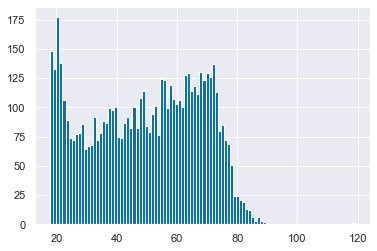

In [68]:
BES_Panel["age"][BES_Panel["ns_sec"].isnull()].hist(bins=100)

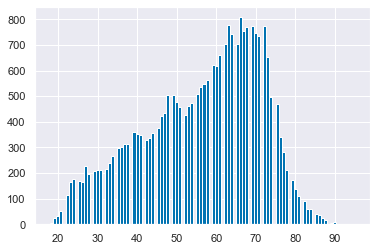

In [69]:
BES_Panel["age"][BES_Panel["ns_sec"].notnull()].hist(bins=100)

In [ ]:
# hmm - was expecting a "cleaner" cut with ns_sec missing values all being Long-Term Unemployed/Full-time students
# look at a combined panel
# -> to fill in gaps
# -> see how stable the variable is for a given respondent over different waves

In [74]:
corrs = pd.get_dummies(BES_Panel).corrwith(BES_Panel["ns_sec"].isnull())

In [77]:
corrs.dropna().sort_values().head(50)

justIT_No                                                                                                                        -0.944724
ccinoIT_No                                                                                                                       -0.901883
cci_No                                                                                                                           -0.857290
occCheck_Very well                                                                                                               -0.363088
occCheck_Fairly well                                                                                                             -0.325248
ns_sec_analytic_Lower professional and managerial and higher supervisory                                                         -0.286023
ns_sec_analytic_Intermediate occupations                                                                                         -0.220117
ns_sec_L4.1 Traditional emp

In [ ]:
# cci: Employed in creative and cultural industries
# ccinoIT: Employed in creative and cultural industries (excluding IT)
# justIT: Employed in IT industry

In [83]:
BES_Panel["cci"].value_counts(dropna=False)

No     24444
NaN     6070
Yes     1663
Name: cci, dtype: int64

In [84]:
BES_Panel["ccinoIT"].value_counts(dropna=False)

No     25024
NaN     6070
Yes     1083
Name: ccinoIT, dtype: int64

In [85]:
BES_Panel["justIT"].value_counts(dropna=False)

No     25527
NaN     6070
Yes      580
Name: justIT, dtype: int64

In [82]:
# jobzone: O*Net Job Zone Occupation Code
# https://www.onetonline.org/find/zone?z=0&g=Go

# JACS_subject_label: 
# JACS_subject : letter codes
# https://www.hesa.ac.uk/support/documentation/jacs/jacs3-principal

BES_Panel["jobzone"].value_counts()

2.0    8361
4.0    6402
3.0    5114
5.0    2009
1.0     338
Name: jobzone, dtype: int64

In [9]:
BES_Panel["ns_sec_analytic"].value_counts()

Lower professional and managerial and higher supervisory    8375
Intermediate occupations                                    5549
Higher professional occupations                             3628
Semi-routine occupations                                    2479
Employers in small organisations and own account workers    1922
Lower supervisory and technical occupations                 1707
Routine occupations                                         1541
Employers in large organisations and higher managerial       906
Name: ns_sec_analytic, dtype: int64

In [13]:
BES_Panel["sector"].value_counts()

Private sector firm of company Including, for example, limited companies and PLCs                                          13620
Other public sector employer Incl eg: - Central govt/ Civil Service/ Govt Agency - Local authority/ Local Educ Auth/sch    10392
Self-employed                                                                                                               2337
Don't know                                                                                                                  1920
Charity/voluntary sector Including, for example, charitable companies, churches, trade unions:                              1786
Other                                                                                                                        917
Nationalised industry or public corporation *Including, for example, the Post Office and the BBC                             676
Own your own business / company                                                                  

In [16]:
BES_Panel["profile_socialgrade_cie"].value_counts()

C1    8324
b     6914
a     5006
C2    4823
e     4043
d     3067
Name: profile_socialgrade_cie, dtype: int64

In [19]:
BES_Panel["profile_work_stat"].value_counts()

(8,)

In [27]:
pan_dataset_allr_values.columns

Index(['Economic: Left(0) <-> Right(200){uniform}',
       'Social: Liberalism(0) <-> Conservatism(200){uniform}',
       'Economic: Left <-> Right{gaussian-ish}',
       'Social: Liberalism <-> Conservatism{gaussian-ish}',
       'Economic: Left <-> Right{gaussian-ish}completish',
       'Economic: Left <-> Right{gaussian-ish}complete',
       'Social: Liberalism <-> Conservatism{gaussian-ish}completish',
       'Social: Liberalism <-> Conservatism{gaussian-ish}complete',
       'Economic: Left <-> Right{gaussian-ish}complete_fully',
       'Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'],
      dtype='object')

id
1        64
2        68
3        82
4        57
5        74
         ..
98447    29
98448    30
98449    36
98450    26
98451    44
Name: Age_at_W19, Length: 97006, dtype: int32

In [53]:
BES_Panel["EconomicLeftRight"] = pan_dataset_allr_values.loc[BES_Panel.index,pan_dataset_allr_values.columns[0]]
BES_Panel["SocialLibAuth"] = pan_dataset_allr_values.loc[BES_Panel.index,pan_dataset_allr_values.columns[1]]
BES_Panel["AgeComplete"] = pan_dataset_ages.loc[BES_Panel.index,"Age_at_W19"].round().astype(int)
BES_Panel["redistNum"] = BES_Panel["redistSelf"].cat.codes.replace(11,np.nan)
BES_Panel["leftRightNum"] = BES_Panel["leftRight"].cat.codes.replace(11,np.nan)

In [54]:
# search(BES_Panel,"leftRight")


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

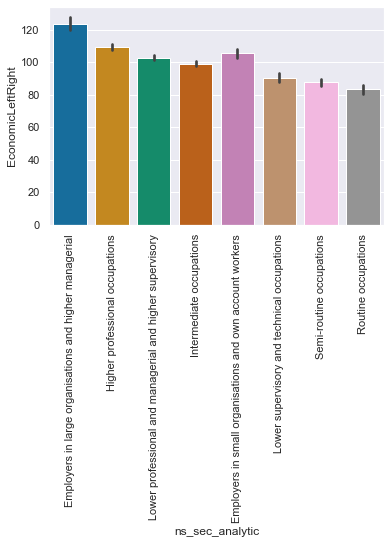

In [36]:
sns.barplot(data=BES_Panel,x="ns_sec_analytic",y="EconomicLeftRight")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

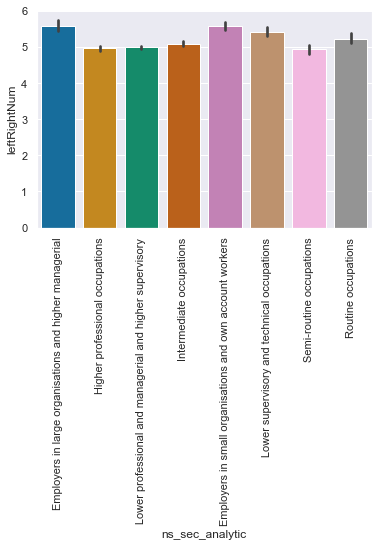

In [55]:
sns.barplot(data=BES_Panel,x="ns_sec_analytic",y="leftRightNum")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

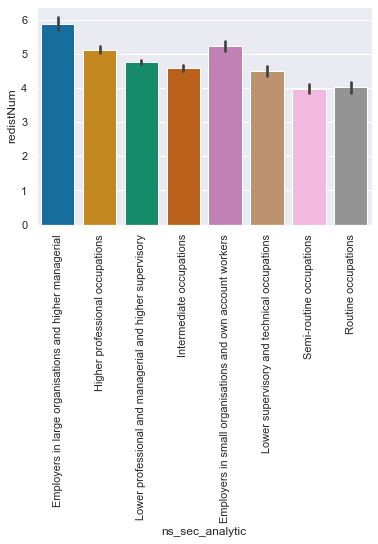

In [50]:
sns.barplot(data=BES_Panel,x="ns_sec_analytic",y="redistNum")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

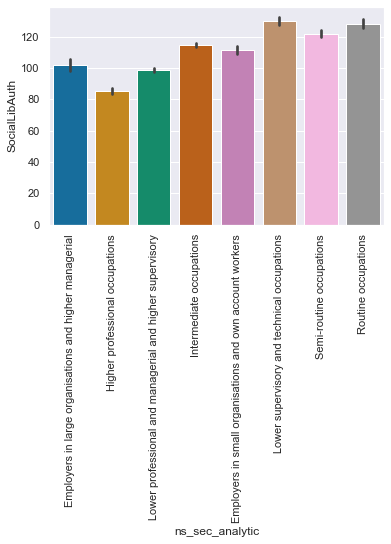

In [37]:
sns.barplot(data=BES_Panel,x="ns_sec_analytic",y="SocialLibAuth")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

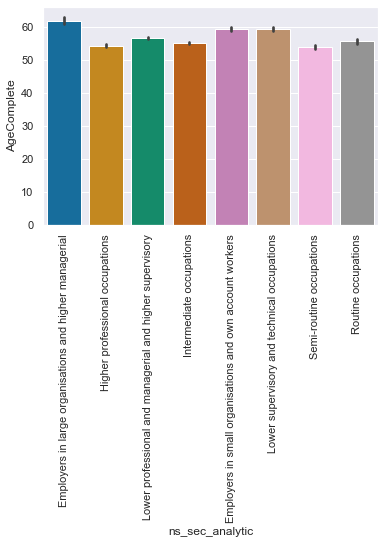

In [43]:
sns.barplot(data=BES_Panel,x="ns_sec_analytic",y="AgeComplete")
plt.xticks(rotation=90)

In [49]:
search(BES_Panel,"redistSelf")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

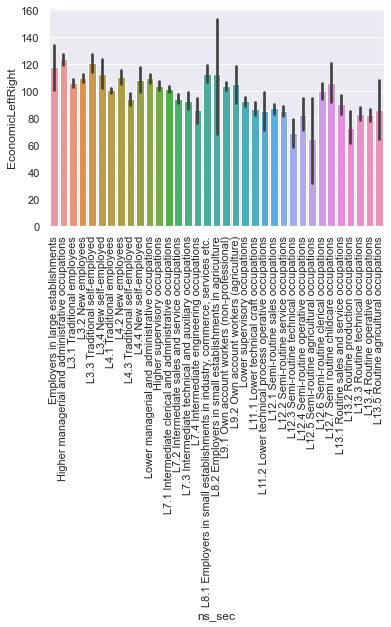

In [56]:
sns.barplot(data=BES_Panel,x="ns_sec",y="EconomicLeftRight")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

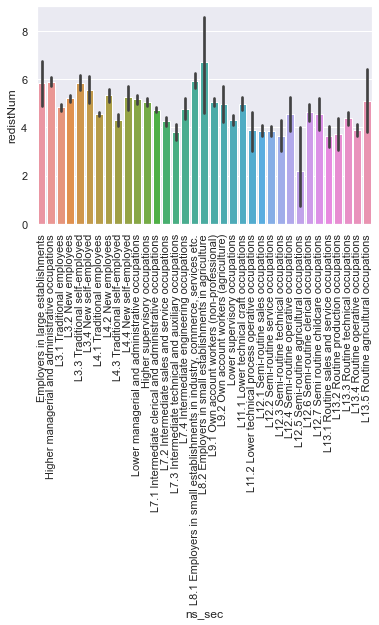

In [59]:
sns.barplot(data=BES_Panel,x="ns_sec",y="redistNum")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

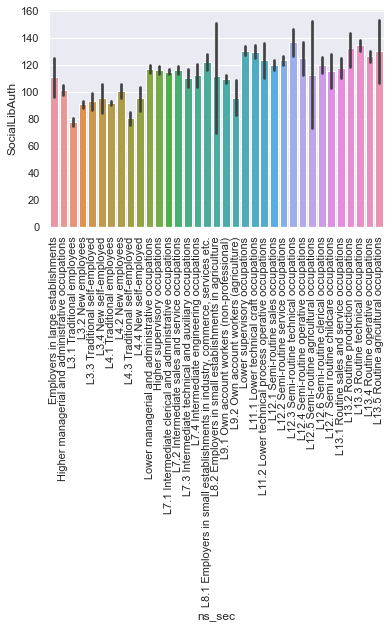

In [57]:
sns.barplot(data=BES_Panel,x="ns_sec",y="SocialLibAuth")
plt.xticks(rotation=90)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

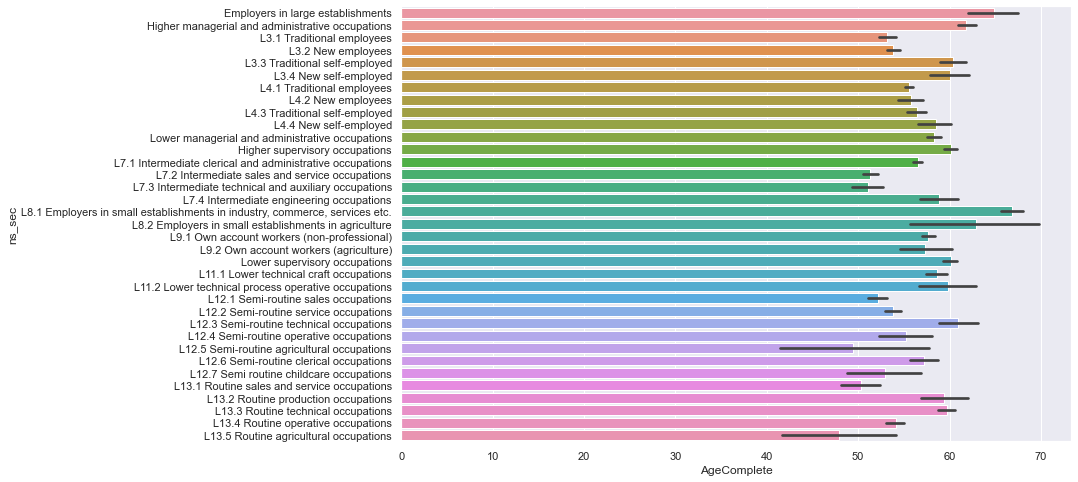

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(data=BES_Panel,y="ns_sec",x="AgeComplete")
plt.xticks(rotation=0)

# note - ns_sec non-missing-value sample heavily old-skewed!